# 1. Introduction

### Overview
Within your deliverable you are expected to:
* Define the question, the metric for success, the context, experimental design taken.
* Read and explore the given dataset.
* Define the appropriateness of the available data to answer the given question.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Performing regression analysis.
    * Incorporate categorical independent variables into your models.
    * Check for multicollinearity
* Provide a recommendation based on your analysis. 
    * Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
* Challenge your solution by providing insights on how you can make improvements in model improvement.

While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 
    1. Multiple Linear Regression
    2. Quantile Regression
    3. Ridge Regression
    4. Lasso Regression
    5. Elastic Net Regression

### 1.1 Research Question
Study the factors that affect housing prices, and then create a model that would allow the company to accurately predict the sale of prices given certain predictor/target variables.

### 1.2 Metric for Success
The model will be considered a success when it is able to effectively and optimally predict the target variable with 75% to 85% accuracy. The reason I choose this range is because a score below 75% indicates underfitting while a score above 85% indicates overfitting.

### 1.3 Context
As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### 1.4 Experimental Design

Below is the expected flow of my work:
    - Data Cleaning and Preparation
        - Load libraries and dataset
        - Deal with missing values
        - Deal with duplicated records
    - Perform EDA
        - Univariate Analysis
        - Bivariate Analysis
    - Split dataset into testing and training data
    - Carry out regression while providing brief descriptions of how each regression model differs from the               other regression models and what their limitations are
        - Multiple Linear Regression
        - Quantile Regression
        - Lasso Regression
        - Ridge Regression
        - Elastic Net Regression
    - Make predictions using the different regression models
    - Assess the accuracy of the different regression models
    - Make conclusions & challenge the solution

### 1.5 Appropriateness of the Data

The dataset to use for this project can be found by following this link: [http://bit.ly/IndependentProjectWeek7Dataset

Below is the dataset glossary:

* Id 
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15


Some of the variable definitions from the LMS were not complete or were confusing so I looked their definitions up from here: http://rstudio-pubs-static.s3.amazonaws.com/293732_458d9cac35634c78b852db5cd29d9e5e.html

* id - Unique ID for each home sold
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# 2. Data Preparation & Cleaning

### 2.1 Loading Python libraries and the dataset

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
house = pd.read_csv('house_data.csv')
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 2.2 Cleaning & Preparing the Dataset

In [3]:
# check basic info
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


##### 2.2.1 Dealing with Missing Values and Duplicated Records

In [4]:
# check for missing values
house.isna().any()

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

There are no missing values so there is no need to drop any.

In [5]:
# drop duplicates if they're present
house = house.drop_duplicates()
house[house.duplicated()]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


There were no duplicated values so there was no need of dropping any observations from the dataset.

##### 2.2.2 Working with the Columns

In [6]:
# after examining the dataset, I have decided to drop the 'id' column and the last 4 columns as
# I consider them to be unnecessary
house = house.drop(columns = ['id', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])
house.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125


In [7]:
# some things do not make sense to me, like having a bathroom of, say, 4.25, or 
# a floor of 3.5
# so we'll convert the 'bathrooms' and 'floors' variables from float to int

house['bathrooms'] = house['bathrooms'].astype('int64')
house['floors'] = house['floors'].astype('int64')
print("Bathrooms type:", house.bathrooms.dtype)
print("Floors type:", house.floors.dtype)

Bathrooms type: int64
Floors type: int64


We can see that both variables' data types have been successfully converted from float to int.

Now, we move to data manipulation. We will change the numerical values in the 'grade' column into letters to denote the grade level.

According to the description of that column, it is "an index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design,and 11-13 have a high quality level of construction and design".

This column's values will have the following grades:
* Values 1-3 will be in grade 'E'
* Values 4-6 will be in grade 'D'
* Value 7 will be in grade 'C'
* Values 8-10 will be in grade 'B'
* Values 11-13 will be in grade 'A'

In [8]:
house['grade'].mask((house['grade'] == 1), 'E', inplace = True)
house['grade'].mask((house['grade'] == 2), 'E', inplace = True)
house['grade'].mask((house['grade'] == 3), 'E', inplace = True)
house['grade'].mask((house['grade'] == 4), 'D', inplace = True)
house['grade'].mask((house['grade'] == 5), 'D', inplace = True)
house['grade'].mask((house['grade'] == 6), 'D', inplace = True)
house['grade'].mask((house['grade'] == 7), 'C', inplace = True)
house['grade'].mask((house['grade'] == 8), 'B', inplace = True)
house['grade'].mask((house['grade'] == 9), 'B', inplace = True)
house['grade'].mask((house['grade'] == 10), 'B', inplace = True)
house['grade'].mask((house['grade'] == 11), 'A', inplace = True)
house['grade'].mask((house['grade'] == 12), 'A', inplace = True)
house['grade'].mask((house['grade'] == 13), 'A', inplace = True)
house.grade.head(10)

0    C
1    C
2    D
3    C
4    B
5    A
6    C
7    C
8    C
9    C
Name: grade, dtype: object

###### <font color='red'>Add to 'Challenging the Solution'</font>
Find a way to use a function with this instead of changing each value one by one.

Now we move the 'zipcode' column to be our first column and then sort all the observations in the dataset according to the zip code in increasing order.

In [9]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [10]:
# first to move the 'zipcode' column from last index to first index
house = house[['zipcode', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
               'yr_renovated']]
house.head()

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,98178,221900.0,3,1,1180,5650,1,0,0,3,C,1180,0,1955,0
1,98125,538000.0,3,2,2570,7242,2,0,0,3,C,2170,400,1951,1991
2,98028,180000.0,2,1,770,10000,1,0,0,3,D,770,0,1933,0
3,98136,604000.0,4,3,1960,5000,1,0,0,5,C,1050,910,1965,0
4,98074,510000.0,3,2,1680,8080,1,0,0,3,B,1680,0,1987,0


In [11]:
# now to sort in ascending (increasing) order of the zip codes
house = house.sort_values('zipcode')
house.head()

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
12085,98001,210000.0,4,2,1500,5393,2,0,0,3,C,1500,0,1999,0
9337,98001,182500.0,3,2,1830,4744,2,0,0,3,C,1830,0,1997,0
4966,98001,482000.0,4,2,2846,85377,1,0,0,3,B,1976,870,2000,0
6748,98001,175000.0,3,1,1230,13056,1,0,0,4,C,1230,0,1962,0
16318,98001,274950.0,3,1,1840,16679,1,0,0,3,B,1840,0,1989,0


In [12]:
# checking for duplicates again
house[house.duplicated()]

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
21534,98105,599000.0,3,1,1650,1180,3,0,0,3,B,1650,0,2014,0
21474,98106,359800.0,5,2,2170,2752,2,0,0,3,B,2170,0,2014,0
4352,98106,259950.0,2,2,1070,649,2,0,0,3,B,720,350,2008,0
19636,98116,529500.0,3,2,1410,905,3,0,0,3,B,1410,0,2014,0
16380,98119,629950.0,3,2,1680,1683,2,0,0,3,B,1120,560,2014,0


We see now that we have more duplicated values, probably from truncating the 'bathrooms' and 'floors' values when we converted them from floats to integers. We will remove them.

In [13]:
house = house.drop_duplicates()
house[house.duplicated()]

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated


The new duplicated values have been removed from our dataset.

##### 2.2.3 Finding & Dealing with Outliers

I have decided that if there are outliers present, it wouldn't be wise to remove them since they reflect the real world in that there will always be extreme values everywhere. So nothing will be done to them.

##### 2.2.4 Finishing Up

In [14]:
# check our data shape
house.shape

(21605, 15)

We have 21,605 rows and 15 columns. We have lost just 8 records, which is nothing to worry about.

Our dataset is now cleaned and sorted, and we are ready to work with it. We'll then save the new dataset so that we can reload it in case of any irreversible changes made to it.

In [ ]:
# save the dataset at its current state to be used as a checkpoint in case of 
# irreversible errors
house.to_csv('clean_house.csv', index = False)

# to load the new dataset from its last-saved checkpoint, just uncomment the below codes
#house = pd.read_csv('clean_house.csv')
#house.head()

# 3. Exploratory Data Analysis

We need to carry out Exploratory Data Analysis (EDA), not just to get more information about our variables and to explore the relationships they have with one another, but also to determine which regression model would be ideal.

In [15]:
# getting the summary statistics
house.describe(include = 'all')

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
count,21605.000000,2.160500e+04,21605.000000,21605.000000,21605.000000,2.160500e+04,21605.000000,21605.000000,21605.000000,21605.000000,21605,21605.000000,21605.000000,21605.000000,21605.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9809,NaN,NaN,NaN,NaN
mean,98077.938162,5.401939e+05,3.370886,1.749734,2079.993196,1.511145e+04,1.445915,0.007545,0.234251,3.409535,NaN,1788.434529,291.558667,1970.993937,84.341865
std,53.509211,3.674224e+05,0.930094,0.734962,918.560683,4.142750e+04,0.551716,0.086533,0.766217,0.650809,NaN,828.181562,442.630633,29.369131,401.543673
min,98001.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,NaN,290.000000,0.000000,1900.000000,0.000000
25%,98033.000000,3.215000e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,NaN,1190.000000,0.000000,1951.000000,0.000000
50%,98065.000000,4.500000e+05,3.000000,2.000000,1910.000000,7.620000e+03,1.000000,0.000000,0.000000,3.000000,NaN,1560.000000,0.000000,1975.000000,0.000000
75%,98118.000000,6.450000e+05,4.000000,2.000000,2550.000000,1.069500e+04,2.000000,0.000000,0.000000,4.000000,NaN,2210.000000,560.000000,1997.000000,0.000000


### 3.1 Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2db46c438>,
      dtype=object)

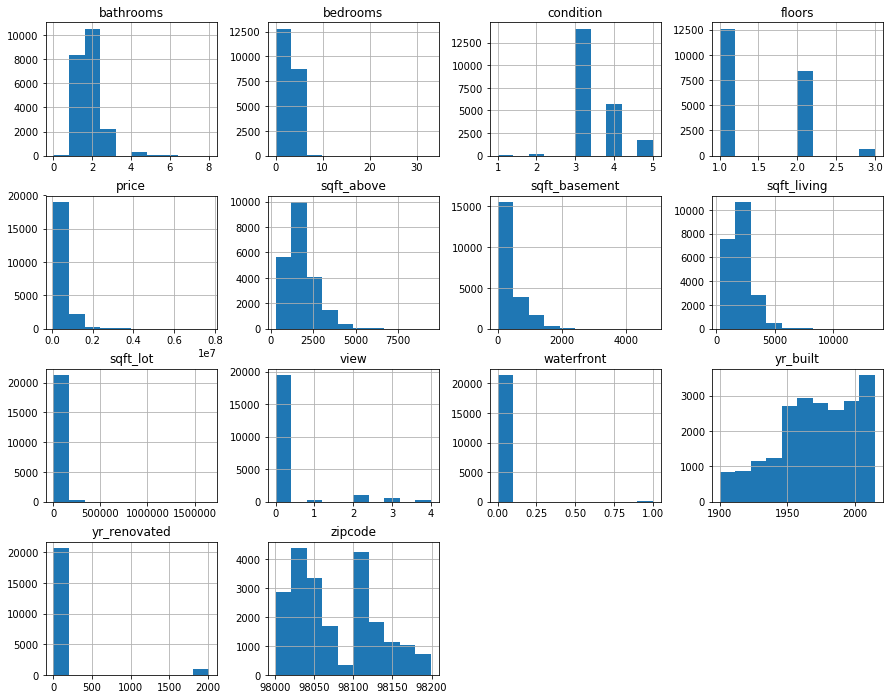

In [16]:
# selecting only the numerical data in our dataset
numerics_df = house.select_dtypes(include = ['int64', 'float64'])

numerics_df.hist(figsize = (15, 12))

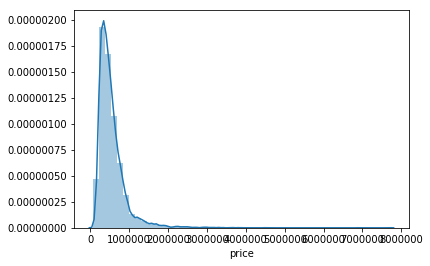

In [17]:
# let's look at the distribution of our dependent variable, price
sb.distplot(house.price)

We see that this is positively skewed (i.e., most of the observations are to the left of the middle of the graph) and distribution does not look normal although it resembles it. This could be due to the presence of outliers, which we will look into in a bit. The shape of the distribution also appears to be leptokurtic, which makes sense given that leptokurtic distributions appear thinner and taller than normal distributions due to the presence of outliers.

In [18]:
# checking the kurtosis of 'prices'
house.price.kurt()

34.51124263192206

We got a kurtosis value of approximately 34.5 which proves that the distribution is leptokurtic since its kurtosis is greater than 3.

Now let's look at the outliers in that column.

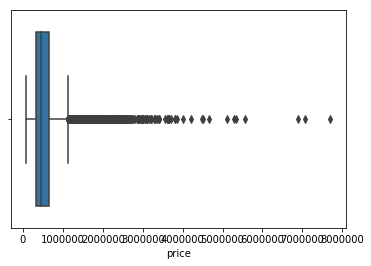

In [19]:
sb.boxplot(house.price)
sb.set(rc = {'figure.figsize' : (15, 12)})

As we can see, there are a lot of outliers in the 'price' column. This explains its positively-skewed, leptokurtic distribution.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2dac028d0>],
      dtype=object)

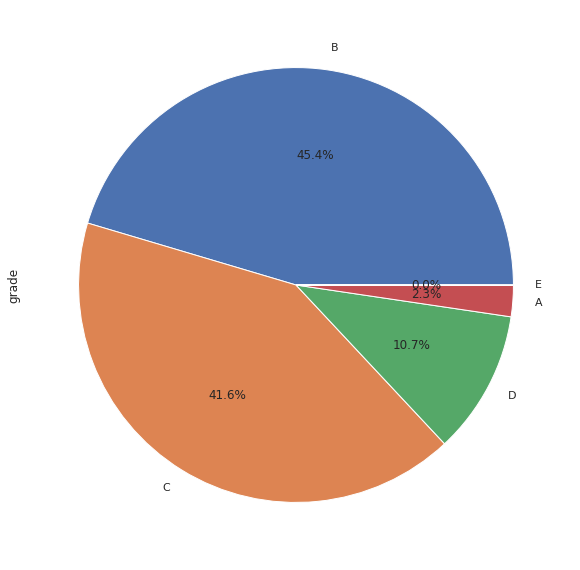

In [24]:
# distribution of the different grades
house.grade.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', figsize = [12, 10],
                                       subplots = True)

We can see from the pie chart here that majority of the houses in the dataset are of Grade B (8-10), followed by those in Grade C (7).

In [31]:
# number of years
house.yr_built.nunique()

116

There are 116 unique years in this dataset so we will not explore them in detail.

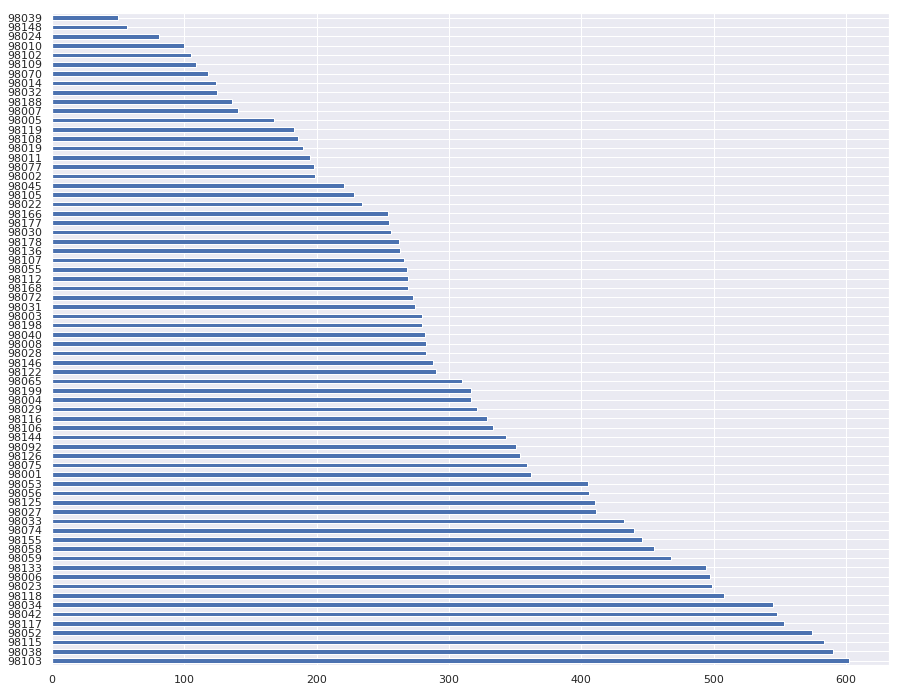

In [26]:
# investigating our 'zipcode' variable
house.zipcode.value_counts().plot(kind = 'barh')

### 3.2 Bivariate Analysis

Text(0.5, 1.0, 'Price per Number of Bedrooms')

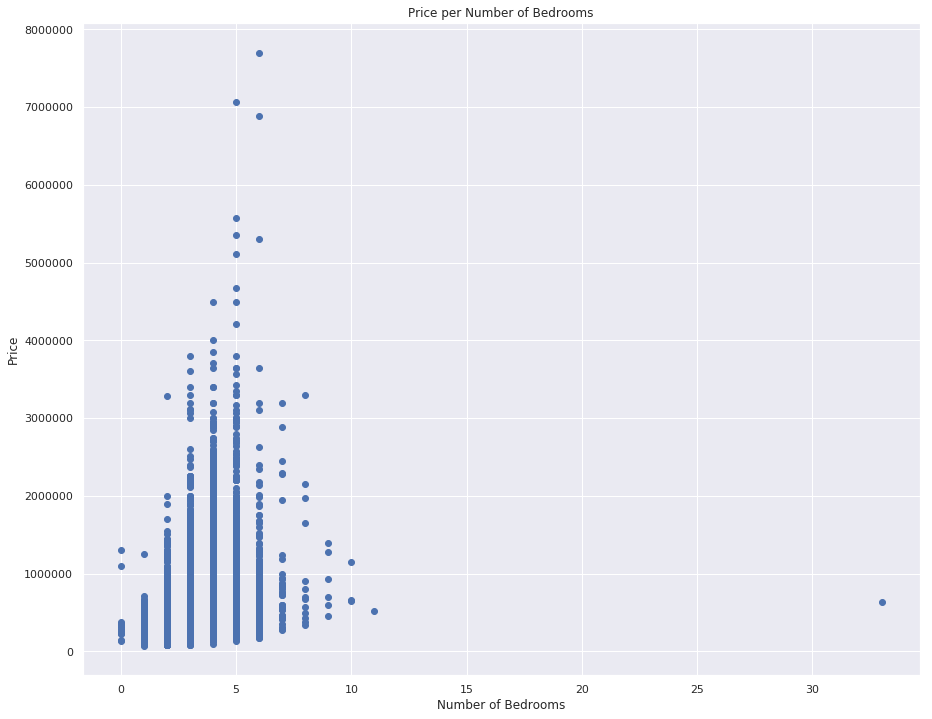

In [23]:
# investigating the effect of number of bedrooms on the price of the house
plt.scatter(house.bedrooms, house.price.values)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price per Number of Bedrooms")

We can see here that there is a somewhat positve-looking relationship between the number of bedrooms and the price of the house which suggests that, to some extent, the price of the house depends on the number of bedrooms. What I find strange is the outlier where the number of bedrooms is around 34, but its price is below 1,000,000.

Text(0.5, 1.0, 'Price per Number of Bathrooms')

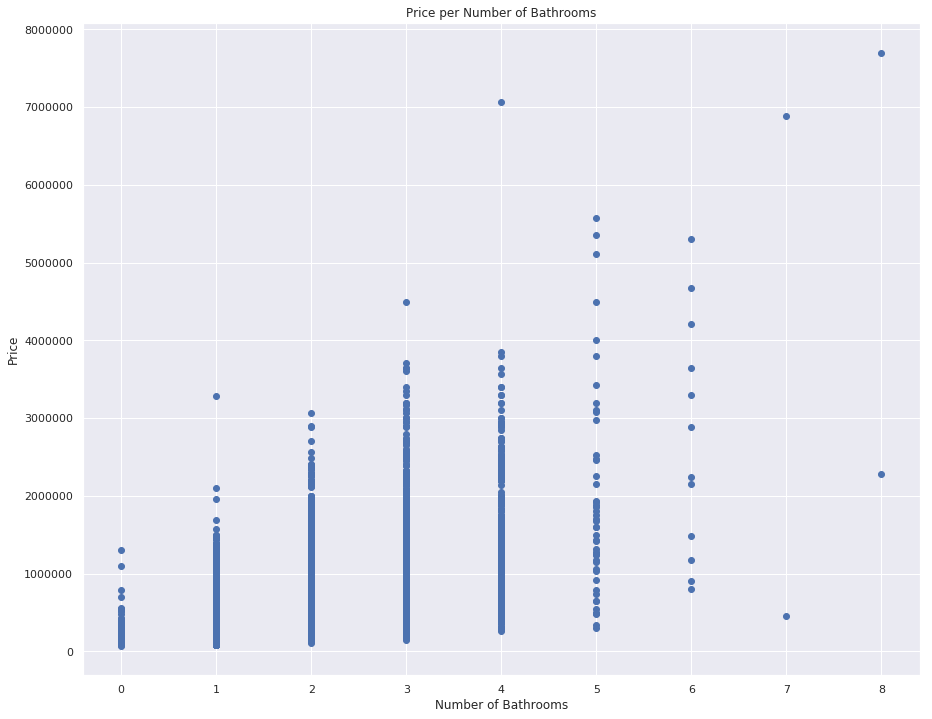

In [27]:
# investigating whether there is a relationship between the number of bathrooms and the price
plt.scatter(house.bathrooms, house.price.values)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.title("Price per Number of Bathrooms")

As with the bedrooms, there is a somewhat positive relationship between price and the number of bathrooms. However, here the relationship appears to be a lot stronger than the one between price and the number of bedrooms.

[Text(0, 0.5, 'Condition Level'), Text(0.5, 1.0, 'Conditions per Grade')]

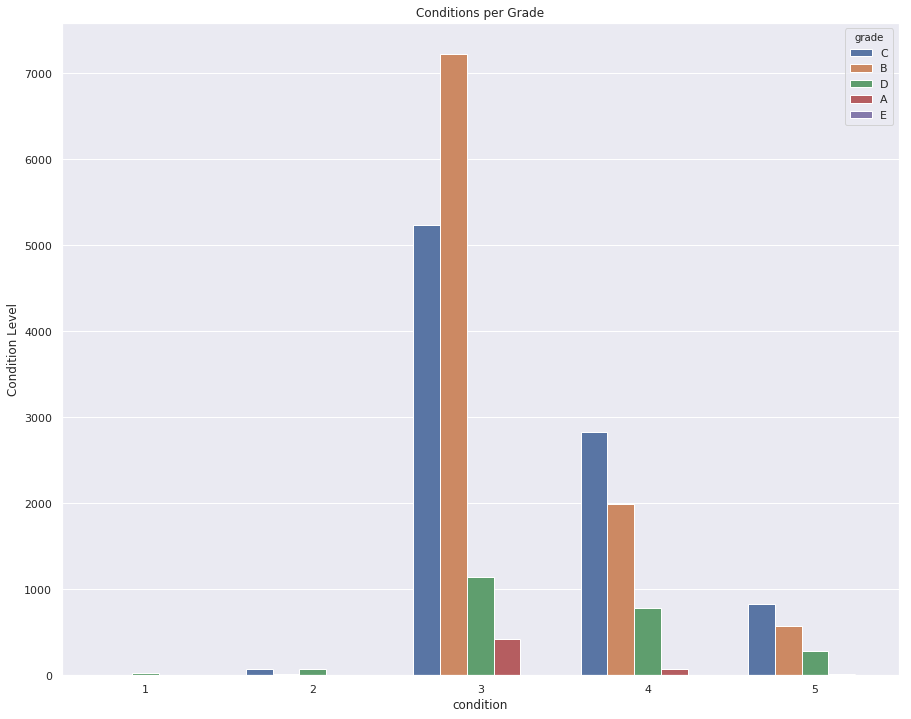

In [25]:
# investigating the relationship between grade and condition
grade_cond = sb.countplot('condition', hue = 'grade', data = house)
grade_cond.set(title = "Conditions per Grade",
        ylabel = "Condition Level")

Most of the houses fall in either Condition 3 or Condition 4, and Condition 3 has mostly Grade B houses followed by Grade C houses whereas Condition 4 has mostly Grade C houses followed by Grade B houses. Through this, we get a sense of the condition and quality of majority of the houses. They're not too good but they're not too bad either.

Now that we are done with EDA, it's now time to move on to creating the regression models.

# 3. Modeling

### 3.1 Multiple Linear Regression

##### 3.1.1 Understanding when to use this

Multiple Linear Regression is a type of Linear Regression that has more than one independent variable. Therefore, Multiple Linear Regression has the same assumptions as Linear Regression which are:
* There should be a linear relationship between the independent variables and the dependent variable
* There should be little to no auto-correlation
* There should be little to no multicollinearity
* There should not be any outliers
* There should be no heteroscedasticity
* The sample observations should be independent of each other.

##### 3.1.2 Checking for multicollinearity

We will start with looking at the correlation between the variables.

In [32]:
corr = house.corr()
corr

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
zipcode,1.000000,-0.053147,-0.152718,-0.159784,-0.199379,-0.129572,-0.096935,0.030291,0.084886,0.003051,-0.261123,0.074816,-0.347105,0.064421
price,-0.053147,1.000000,0.308388,0.510148,0.702067,0.089647,0.237354,0.266334,0.397466,0.036374,0.605595,0.323855,0.054046,0.126498
bedrooms,-0.152718,0.308388,1.000000,0.467586,0.576666,0.031686,0.155861,-0.006588,0.079432,0.028400,0.477561,0.303178,0.154381,0.018689
bathrooms,-0.159784,0.510148,0.467586,1.000000,0.697985,0.085322,0.485155,0.058802,0.177510,-0.125962,0.640051,0.250917,0.433705,0.060704
sqft_living,-0.199379,0.702067,0.576666,0.697985,1.000000,0.172799,0.353722,0.103815,0.284621,-0.058850,0.876597,0.435078,0.318358,0.055292
sqft_lot,-0.129572,0.089647,0.031686,0.085322,0.172799,1.000000,-0.008790,0.021595,0.074731,-0.009016,0.183504,0.015254,0.053227,0.007662
floors,-0.096935,0.237354,0.155861,0.485155,0.353722,-0.008790,1.000000,0.019697,0.024661,-0.293078,0.518320,-0.235746,0.578476,-0.007898
waterfront,0.030291,0.266334,-0.006588,0.058802,0.103815,0.021595,0.019697,1.000000,0.401991,0.016640,0.072076,0.080583,-0.026137,0.092947
view,0.084886,0.397466,0.079432,0.177510,0.284621,0.074731,0.024661,0.401991,1.000000,0.045794,0.167640,0.276993,-0.053142,0.103195
condition,0.003051,0.036374,0.028400,-0.125962,-0.058850,-0.009016,-0.293078,0.016640,0.045794,1.000000,-0.158295,0.174050,-0.361241,-0.060896


From what I can see, there are a number of high correlations. For example, 'sqft_living' seems to be highly correlated with 'sqft_above' (0.876), and 'price' seems to be highly correlated with 'sqft_living' (0.702), 'sqft_above' (0.605), and 'bathrooms' (0.51). This is surprising because I expected the number of bedrooms to be one of the major factors influencing the price of the house. However, the number of bedrooms is fairly correlated to 'sqft_living' (0.576), suggesting multicolliearity, which we will look into using Variance Inflation Factor (VIF).

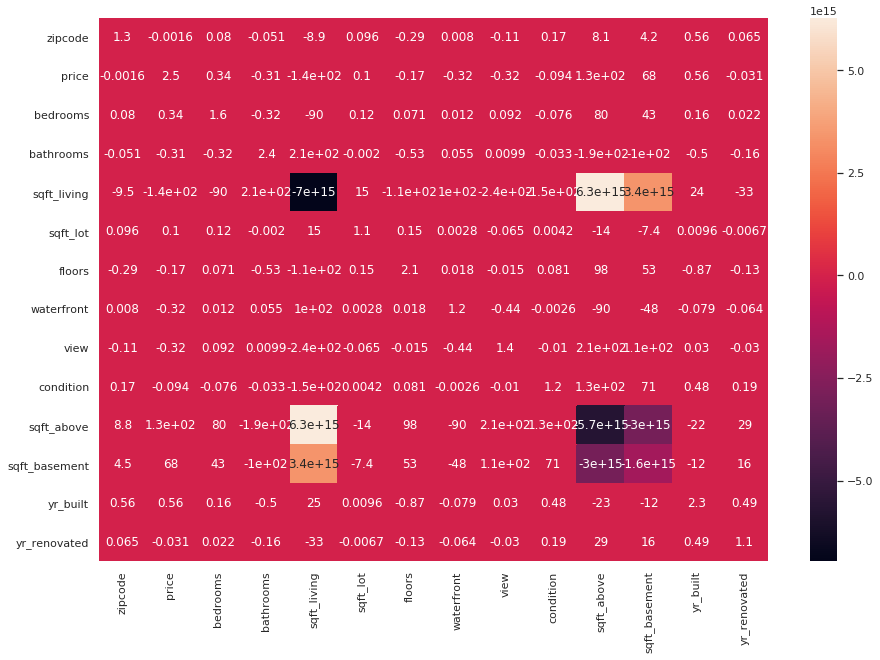

In [33]:
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (15, 10))
sb.heatmap(vif, annot = True)

A VIF score of around 5 indicates that that particular variable has relatively high multicollinearity with one or more variables in the dataset, and that variable needs to be removed to carry out regression that assumes there is little to no multicollinearity. Since this is one of the assumptions of linear regression, of which we will do multiple linear regression, we should create a dataset with little to no multicollinearity.

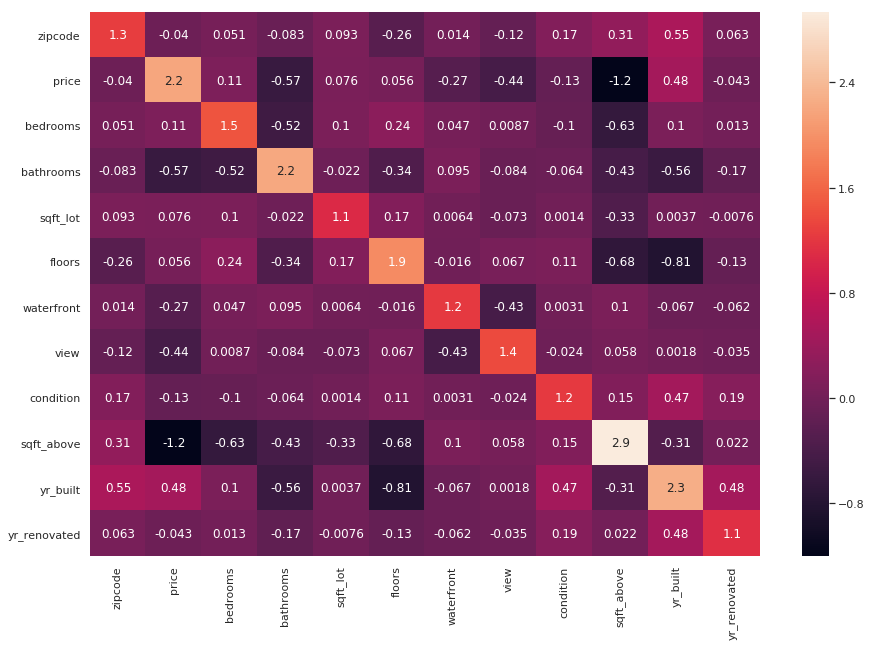

In [34]:
# we will drop 'sqft_living' and 'sqft_basement' so that we can keep 'sqft_above'
house2 = house.drop(columns = ['sqft_living', 'sqft_basement'])
corr2 = house2.corr()
vif2 = pd.DataFrame(np.linalg.inv(corr2.values), index = corr2.index, columns = corr2.columns)

# using a heatmap to display the results
plt.figure(figsize = (15, 10))
sb.heatmap(vif2, annot = True)

This one is now so much better suited for a linear regression model. Note how dropping those two variables lowered (improved) the VIF score of the other variables, like 'price' went from a VIF score of 2.5 to 2.2, showing that the dropped variables were highly correlated with it. We will use this particular dataset when doing multiple linear regression.

##### 3.1.3 Feature Engineering

We need to encode the 'grade' column so that there will not be any issues while training the model that might arise due to the presence of a categorical variable in the dataset.

In [35]:
from sklearn.preprocessing import LabelEncoder

le_ = LabelEncoder().fit(house2['grade'].unique())
class_ = le_.classes_
house2['grade'] = le_.transform(house2['grade'].values)

In [36]:
# previewing our modified dataset
house2.head()

,zipcode,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated
12085,98001,210000.0,4,2,5393,2,0,0,3,2,1500,1999,0
9337,98001,182500.0,3,2,4744,2,0,0,3,2,1830,1997,0
4966,98001,482000.0,4,2,85377,1,0,0,3,1,1976,2000,0
6748,98001,175000.0,3,1,13056,1,0,0,4,2,1230,1962,0
16318,98001,274950.0,3,1,16679,1,0,0,3,1,1840,1989,0


In [37]:
# to look up which grade each value represents
print(class_[2])
print(class_[4])

C
E


##### 3.1.4 Training the Model

In [38]:
# split our new dataset into train & test sets

X2 = house2.drop(columns = ['price'])
y2 = house2['price']
print(X2.shape)
print(y2.shape)

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 100)

print(X_train2.shape, X_test2.shape)
print(y_train2.shape, y_test2.shape)

(21605, 12)
(21605,)
(17284, 12) (4321, 12)
(17284,) (4321,)


In [39]:
# now training our model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# previewing our model's coefficients
coeff_ = pd.DataFrame(reg.coef_, X2.columns, columns=['Coefficient'])  
coeff_

,Coefficient
zipcode,143.364638
bedrooms,-21210.316223
bathrooms,111187.575868
sqft_lot,-0.229194
floors,-28368.100257
waterfront,553399.938904
view,80069.957058
condition,30045.234495
grade,-141047.032375
sqft_above,190.469725


We can see that the number of bedrooms, the size of the parking lot, the number of floors, the grade of the house, and the year the house was built were not great contributors to the price of the house.

##### 3.1.5 Making Predictions & Assessing Model Accuracy

In [41]:
# now let's do prediction on test data
y_pred2 = reg.predict(X_test2)

# check the difference between the actual value and predicted value
df = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
df15 = df.head(15)
df15

,Actual,Predicted
17446,407500.0,548356.325233
14924,590000.0,697412.604882
1836,260000.0,264596.376503
19247,178500.0,363936.343393
10134,546500.0,609077.011562
776,269950.0,504664.524246
14413,653675.0,660858.375458
18428,618500.0,501800.056166
5965,315000.0,481114.300920
14919,462600.0,357024.462194


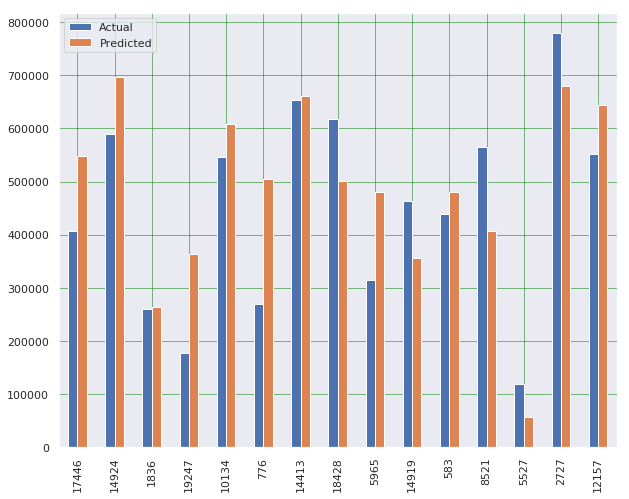

In [42]:
# Now let's plot the comparison of Actual and Predicted values
df15.plot(kind = 'bar', figsize = (10, 8))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

In [43]:
# assessing the model's accuracy
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test2, y_pred2))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 260441.01285540784


In [44]:
ten_of_mean = 0.1 * house2.price.mean()
print("10% of the mean:", ten_of_mean)

10% of the mean: 54019.388095348295


The RMSE is significantly greater than 10% of the mean. This means that our model is not accurate for the most part. I have strong suspicions that we got these values because of two or more of the following:
    * Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case.
    * Poor features: The features we used may not have had a high enough correlation with the values we were trying to predict.

##### 3.1.6 Residual Plots & Heteroscedasticity Test

In [45]:
# now creating residuals by substracting the test value from the predicted value for each row
# in our dataset

residuals = np.subtract(y_pred2, y_test2)
residuals.mean()

-1171.9563531762676

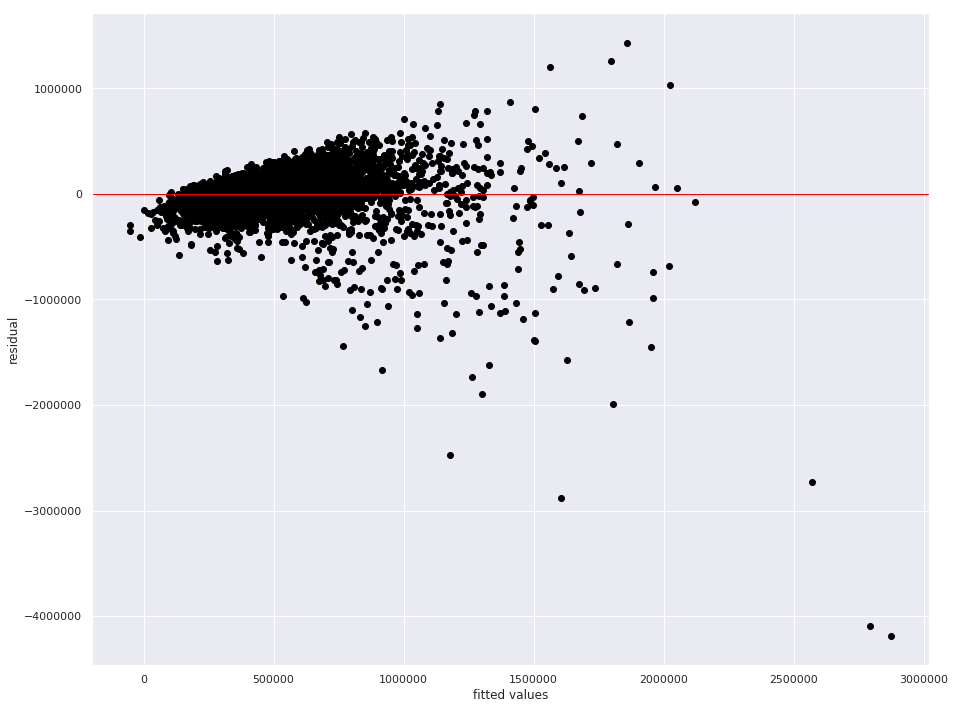

In [46]:
# plotting the residuals

plt.scatter(y_pred2, residuals, color = 'black')
plt.figsize = [12, 10]
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = residuals.mean(), color = 'red', linewidth = 1)
plt.show()

Now testing for heteroscedasticity using Barlett's test. This test establishes as a null hypothesis that the variance is equal for all our datapoints, and the new hypothesis that the variance is different for at least one pair of datapoints.

In [47]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred2, residuals)
print("Test result:", test_result)
print("P-value:", p_value)

Test result: 29.305010987858505
P-value: 6.183558033344463e-08


In [48]:
# to interpret the results, we must compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred2) - 1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

print("Degree of Freedom:", degree_of_freedom)
print("Probability:", probability)
print("Critical Value:", critical_value)

Degree of Freedom: 4320
Probability: 0.9999999381644197
Critical Value: 4829.631509672015


If the test_result is greater than the critical value, then we reject our null hypothesis. This would mean that there are patterns to the variance of the data. Otherwise, we can identify no patterns, and we accept the null hypothesis that the variance is homogeneous across our data

In [49]:
if (test_result > critical_value):
  print('The variances are unequal (heterogeneous), and the model needs to be reassessed.')
else:
  print('The variances are equal (homogeneous). The model is doing well.')

The variances are equal (homogeneous). The model is doing well.


### 3.2 Quantile Regression

##### 3.2.1 Know when to use this

Quantile regression is an extension of linear regression which is generally used when outliers are present and the data also has high skewedness and heteroscedasticity. Unlike normal linear regression, quantile predicts the quanatile for a given independent variable or set of independent variables.

Quantile regression works best when the following are true of our dependent variable *y*:
    - is continuous
    - does not have any zeros
    - does not have too many repeated values

In [50]:
# checking the datatype of our dependent variable
house.price.dtype

dtype('float64')

Our dependent variable is of data type float which confirms it is continuous.

In [51]:
# checking for zeros
house.loc[house.price == 0.0]

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated


There are no zeros in our target variable, which is another condition that has been checked.

In [54]:
# previewing our repeated values
house.price.value_counts().head(10)

450000.0    172
350000.0    172
550000.0    158
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
Name: price, dtype: int64

As we can see, there are a lot of repeated values in this variable so we have not met all the requirements for quantile regression.

##### 3.2.2 How it differs from other regression models

Quantile regression is better than linear regression in that it is quite robust to outliers and also works well with skewed and highly heterogeneous data.

##### 3.2.3 Application

In [55]:
# encode the 'grade' variable
le_ = LabelEncoder().fit(house['grade'].unique())
class_ = le_.classes_
house['grade'] = le_.transform(house['grade'].values)

In [56]:
X = house.drop(columns = ['price'])
y = house['price']
print(X.shape)
print(y.shape)

(21605, 14)
(21605,)


In [109]:
# splitting our 'house' dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(y_train.shape)

(17284, 14)
(17284,)


In [65]:
# creating a linear regression model 
model = LinearRegression(fit_intercept = True, normalize = False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean squared error: {0:.2f}".format(np.mean((y_pred - y_test) ** 2)))
print("Variance score: {0:.2f}".format(model.score(X_train, y_train)))

Mean squared error: 49543877945.06
Variance score: 0.62


The variance score of 0.62 means that our linear regression model did not do a good job of fitting to the data. We now do quantile regression to compare with it.

In [163]:
my_x = house.iloc[:, 0:1 - 2:].values
my_y = house.iloc[:, 1].values

print(my_x.shape)
print(my_y.shape)

(21605, 14)
(21605,)


In [167]:
from mlinsights.mlmodel import QuantileLinearRegression
quantile = QuantileLinearRegression()
quantile.fit(my_x, my_y)

QuantileLinearRegression(copy_X=True, delta=0.0001, fit_intercept=True,
                         max_iter=10, n_jobs=1, normalize=False, quantile=0.5,
                         verbose=False)

In [170]:
from pandas import DataFrame
data = dict(X = my_x.ravel(), Y = my_y, clq = quantile.predict(my_x))
df = DataFrame(data)
df.head()

ValueError: arrays must all be same length

In [166]:
# importing the necessary library
import statsmodels.formula.api as smf

# finding the regression coefficients for each of our quartiles
quartile = 0.25

quantile_25 = smf.quantreg('my_y ~ my_x', house)
res_25 = quantile_model.fit(quartile)

print(res.summary())

ValueError: operands could not be broadcast together with shapes (15,) (14,) 

##### 3.2.4 Limitations
The use of this model isn’t justifiable if the coefficients for a particular quantile doesn’t differ significantly from those obtained via linear regression

### 3.3 Ridge Regression

##### 3.3.1 Know when to use this

Ridge regression relies on the following:
    * Linearity
    * Constant variance (no outliers)
    * Independence of observations
    * Normality doesn’t need to be assumed

##### 3.3.2 How it differs from other regression models
Ridge Regression is an advantage over linear or polynomial regression because it can work with data that has high collinearity.

Ridge regression also uses penalization which imposes restrictions on the regression coefficients in order to get a much more realistic result which is also easier to interpret.

Lastly, while ridge and lasso both use penalization to optimize the model's predictions, ridge uses L1 penalization (alpha) while lasso uses L2 penalization (lambda). Ridge reduces the regression model's coefficients such that they are closer to 0 than they originally were whereass lasso actually shrinks them to 0 where possible.

##### 3.3.3 Application

In [75]:
# we will use a linear regression as our baseline model
reg = LinearRegression()
reg.fit(X, y)
linear_model = (mean_squared_error(y_true = y, y_pred = reg.predict(X)))
print("Linear Model MSE:", round(linear_model, 4))

Linear Model MSE: 51428080664.7152


In [76]:
# in order to create our ridge model we need to first determine the most appropriate 
# value for the L2 regularization 

#we first create our ridge model and indicate normalization in order
# to get better estimates
from sklearn.linear_model import Ridge
ridge = Ridge(normalize = True)

In [77]:
# next we setup the grid search that we will that will take in several arguments
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = ridge, param_grid = {'alpha' : np.logspace(-5, 2, 8)},
                      scoring = 'neg_mean_squared_error', n_jobs = 1, refit = True, cv = 10)

In [78]:
print("Ridge:", ridge)
print("Search:", grid_search)

Ridge: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)
Search: GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)


In [79]:
# we will fit our variables to the grid search and then use it to get the best parameters and the
# best score that will allow us to determine the model's strength
grid_search.fit(X, y)

print("Best Params:", grid_search.best_params_)
print("Best Score:", abs(grid_search.best_score_))

Best Params: {'alpha': 0.01}
Best Score: 56264348690.8337


Our baseline model's MSE was 51428080664.7152, the ridge regression model's MSE is 56264348690.8337. Clearly our ridge model is performing worse than our baseline model. 

We now will try ridge again but this time with the best parameter of 0.01.

In [80]:
ridge = Ridge(normalize = True, alpha = 0.01)
ridge.fit(X, y)
ridge_MSE = (mean_squared_error(y_true = y, y_pred = ridge.predict(X)))
print(ridge_MSE)

51434579705.95447


This is a lower score than the one gotten using the grid search, but it's still slightly larger than that of our baseline model. The reason for the large difference in the MSE was because cross validation had not been carried out

##### 3.3.4 Limitations
Ridge regression has the following limitations:
    * It will include all the predictors in the final model instead of eliminating the irrelevant coefficients
    * Doesn’t perform feature selection
    * Unlike lasso regression, it doesn’t shrink the coefficients completely to 0

### 3.4 Lasso Regression

##### 3.4.1 Know when to use this

Lasso regressio is typically used under the following circumstances:
    * the target variable is normally distributed
    * there is a linear relationship between the independent variable and the dependent variable
    * normality is not assumed

##### 3.4.2 How it differs from other regression models
Lasso differs from ridge regression in that it shrinks its regression coefficients to absolute zero where necessary while ridge comes close to zero but is never zero.

##### 3.4.3 Application

In [81]:
# first we standardize our data using a scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = house.drop(columns = ['price'])
y = house['price']

X_scaled = scaler.fit_transform(X)

In [85]:
# next we create our Lasso model
from sklearn.linear_model import Lasso

lasso = Lasso(tol = 0.0001)
lasso_model = lasso.fit(X, y)

print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6190313514122774
lasso MSE: 51428080827.93754
lasso coef: [ 6.30990364e+00 -5.18377764e+04  5.86695243e+04  3.10439807e+02
 -3.04851911e-01  2.45748611e+04  5.59285618e+05  5.54125971e+04
  1.82494643e+04 -1.02492017e+05 -6.19009903e+01 -9.78722056e+01
 -3.37798271e+03  5.58766824e+00]


In [86]:
# splitting the data into training and test sets, building Lasso, and choosing the regularization 
# parameter with the help of GridSearch
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}


linear = LinearRegression()
lasso = Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("-------------------------------------------------")

print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("-------------------------------------------------")

print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("-------------------------------------------------")

print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
-------------------------------------------------
lasso score: 0.6120425733453059
linear score: 0.6120423629485992
-------------------------------------------------
lasso MSE: 53914049104.99209
linear MSE: 53914078343.60849
-------------------------------------------------
lasso best estimator coef: [-1.29020458e+01 -5.07204808e+04  6.07387146e+04  3.08303463e+02
 -2.95442079e-01  2.37090011e+04  6.01692475e+05  5.33774433e+04
  1.67108574e+04 -1.02390760e+05 -6.23972266e+01 -9.62710406e+01
 -3.37320817e+03  3.85233759e+00]
linear coef: [-1.29030483e+01 -5.07206162e+04  6.07390684e+04  1.52646048e+02
 -2.95441456e-01  2.37094594e+04  6.01706952e+05  5.33768676e+04
  1.67111291e+04 -1.02391119e+05  9.32597982e+01  5.93862497e+01
 -3.37321521e+03  3.85205632e+00]


From this algorithm, we now know that the best hyperparameter value to use for alpha is 0.1. We also see that there are not much differences between the lasso model and the linear model.

In [87]:
# list to store lasso regression coefficients
lasso_coeffs = [] 

In [88]:
# building Lasso for 200 values of alpha and storing the resulting coefficients in our list
lasso_alphas = np.arange(0, 20, 0.1) 
for i in range(200):
    lasso = Lasso(alpha = lasso_alphas[i])
    lasso.fit(X_train, y_train)
    lasso_coeffs.append(lasso.coef_) 

In [89]:
print("Alpha size:", lasso_alphas.shape)
print("Coeffs size:", len(lasso_coeffs))

Alpha size: (200,)
Coeffs size: 200


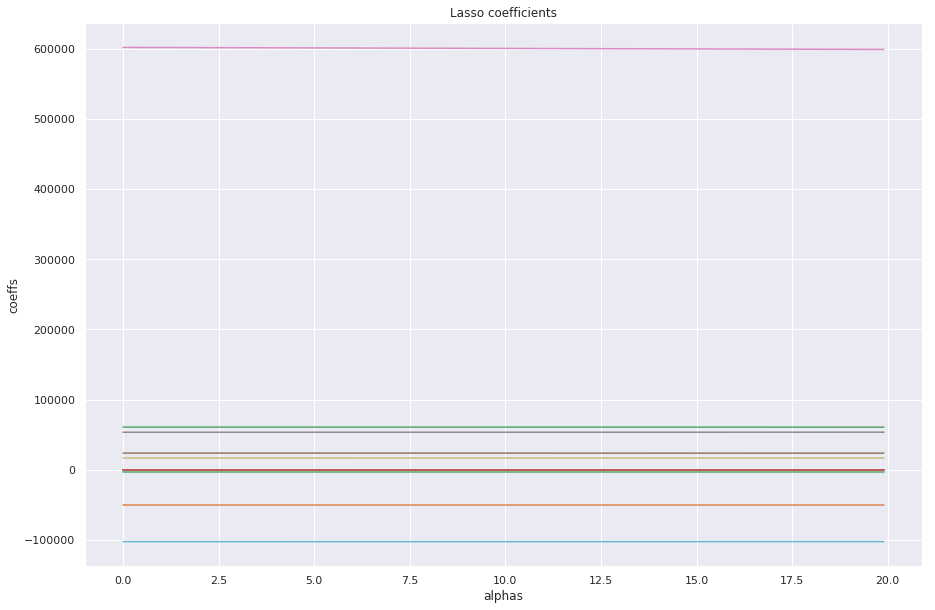

In [90]:
# visualizing the Lasso coefficient plots 
plt.figure(figsize = (15,10))
plt.plot(lasso_alphas, lasso_coeffs)
plt.title('Lasso coefficients')
plt.xlabel('alphas')
plt.ylabel('coeffs')

plt.show()

##### 3.4.4 Limitations

### 3.5 Elastic Net Regression

##### 3.5.1 Know when to use this

##### 3.5.2 How it differs from other regression models

##### 3.5.3 Application

In [91]:
# getting the MSE of the linear model which will be our baseline model
linear_model

51428080664.71518

In [96]:
# checking our baseline model's coefficients
coef_dict_baseline = {}
for coef, feat in zip(reg.coef_, X_train.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'zipcode': 6.301227427061683,
 'bedrooms': -51838.99557066051,
 'bathrooms': 58673.00886205764,
 'sqft_living': 153.70032625457057,
 'sqft_lot': -0.3048428641957249,
 'floors': 24579.576801881645,
 'waterfront': 559438.6372650162,
 'view': 55407.01781894226,
 'condition': 18252.184940327934,
 'grade': -102495.60567497791,
 'sqft_above': 94.83445048216062,
 'sqft_basement': 58.865875801411015,
 'yr_built': -3378.0512412605085,
 'yr_renovated': 5.584871301524972}

In [93]:
# creating our Elastic Net model now
# like lasso and ridge, it requires normalized data
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(normalize = True)

In [94]:
# we will also use a grid search
grid_search = GridSearchCV(estimator = elastic, param_grid = {'alpha' : np.logspace(-5, 2, 8),
                                                         'l1_ratio':[.2, .4, .6, .8]}, 
                      scoring = 'neg_mean_squared_error', n_jobs = 1, refit = True, cv = 10)

In [97]:
# displaying the best parameters and best score of our model
grid_search.fit(X_train, y_train)
print("Best Parameter:", grid_search.best_params_)
print("Best score:", abs(grid_search.best_score_))

Best Parameter: {'alpha': 1e-05, 'l1_ratio': 0.8}
Best score: 50959609408.33042


From the above calculations, we see that we should use an alpha value of 1e-05 and a l1 ratio value of 0.8. We also got a score of roughly 50,959,609,408 which is smaller than our baseline model's score of about 51,428,080,664. We will now try Elastic Net regression again but this time we will adjust the parameters to the recommended values and see if there will be any improvements.

In [98]:
elastic = ElasticNet(normalize = True, alpha = 1e-05, l1_ratio = 0.8)
elastic.fit(X_train, y_train)
second_elastic = (mean_squared_error(y_true = y_train, y_pred = elastic.predict(X_train)))
print(second_elastic)

50682586320.096756


We can see that our model's score has improved only slightly.

In [99]:
# checking our coefficients
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_, X_train.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'zipcode': 10.960210201369051,
 'bedrooms': -45019.3333935582,
 'bathrooms': 59812.79429344755,
 'sqft_living': 118.31578068343815,
 'sqft_lot': -0.2617722814752927,
 'floors': 21917.812381780062,
 'waterfront': 586341.2487453059,
 'view': 54875.67277066793,
 'condition': 18349.99597653353,
 'grade': -99364.8448045319,
 'sqft_above': 119.44607995506193,
 'sqft_basement': 87.81353975861211,
 'yr_built': -3110.981140215498,
 'yr_renovated': 8.606793676900903}

##### 3.5.4 Limitations

A limitation of Elastic net regression is that it can suffer from double shrinkage, which leads to increased bias and poor predictions. 